## **Máquina de Turing não determinística**

O algoritmo abaixo realiza uma simulação de uma Máquina de Turing não determinista. Com o intuito de entender melhor os conceitos de uma máquina de Turing (MT) e também de uma Linguagem Recursivamente Enumerável (LRE), esse algoritmo é capaz de determinar se uma MT aceita uma determinada palavra w.

In [ ]:
class Linguagem:
    def __init__(self):
        self.estados = []
        self.simb = []
        self.alfabPilha = []
        self.dicionario = dict()
        self.wordTeste = []
        self.estadosFinais = []
        self.pilhaTransicoes = []
        self.limitEsquerda = ''
        self.simbBranco = ''

Na instância da classe Linguagem serão armezanadas: 

Estados da Máquina de Turing
Alfabeto de caracteres da pilha
Palavras de teste
Dicionário com as transições que são reconhecidas pela MT
Os símbolos que a fita reconhece
O Símbolo que representa o limite da fita a sua esquerda
O símbolo branco representado na fita
Uma pilha de transições, onde dado um estado "E" e um símbolo "S" da fita, caso exista mais de uma possibilidade futura para esses estados "E,S" , sofrerá uma bifurcação e serão armazenados na pilha de transições. Sendo que cada elemento dessa pilha, terá sua posição no cabeçote de leitura, configuração na fita e seu próprio estado atual.

In [ ]:
def lerTrans(self, num):
        for i in range (0, num):
            trans = input().split()
            self.criarDic(trans)

    def criarDic(self, trans):
        dupla = trans[0]+trans[1]
        if(dupla in self.dicionario):
            self.dicionario[dupla] = self.dicionario[dupla] + [[trans[2],trans[3], trans[4]]]
        else:
            novaTrans = {trans[0]+trans[1]:[[trans[2],trans[3], trans[4]]]}
            self.dicionario.update(novaTrans)


Após a leitura da transição atual, cria-se uma tupla onde será armazenado um vetor, onde esse vetor armazena outros vetores, sendo que cada elemento é um outro vetor, contendo sempre três elementos: simboloEscritoNaFita, estadoDestino, moverCabecoteDireção. Sendo nessa fase que se torna possível o "não determinismo" ser armazenado". Nesse estado existe mais de uma possibilidade de transição ao ler determinado símbolo e esse vetor terá uma valor > 1.

In [ ]:
def escrever(self, fita, caractere, registrador):
      nova_fita = fita.copy()
      nova_fita[registrador] = caractere
      return nova_fita

    def mover(self, fita, registrador, direcao):
      if(direcao == 'I'):
        return registrador
      elif(direcao == 'E'):
        if(registrador == 0):
          return registrador
        return registrador - 1
      elif(direcao == 'D'):
        if(len(fita)-1 == registrador):
          fita.append(self.simbBranco)
        return  registrador + 1

Algumas condições serão impostas:

O registrador nunca terá valor < 0. (Limitado a esquerda)

Poderá ter valor acima de 0. 
(Contanto que se verifique sempre o tamanho da lista atual e caso o registrador chegue ao fim da lista atual e tente se mover à sua direita, antes disso é feito um append de um "simbBranco", símbolo branco nessa lista).

In [ ]:
def validarTransicao(self, estadoAtual, fita, registrador, pilhaTrans):
        parou = True
        caractereLido = fita[registrador]
        if((estadoAtual+caractereLido) in self.dicionario):
          parou = False
          duplas = self.dicionario.get(estadoAtual+caractereLido)
          for dupla in duplas:
           novoRegistrador = self.mover(fita, registrador, dupla[2])
           pilhaTrans.append([dupla[0], self.escrever(fita, dupla[1], registrador), novoRegistrador])
        
        return parou

O índice da fita é armazenado pelo registrador sempre que for validar uma transição, realizando uma busca de uma transição no dicionário. Caso ache, ele não irá parar, logo se parar torna-se uma expressão falsa e a busca retornará um vetor com elementos do tipo "estadoDestino, simboloEscritoNaFita, moverCabecoteDirecao". Sendo necessário a realização de uma iteração nesse vetor, onde passa para a pilha de transições a configuração da fita, estados e registrador.

Observação!
É necessário que esses novos valores sejam passados para a pilha de transições, sem modificar a configuração atual da Máquina de Turing, por isso é chamado as funções mover e escrever, pois as mesmas retornam um novo valor da fita e do registrador e as inserem na pilha de transições.

In [ ]:
def isAccepted(self, estado, parou):
      if(parou and estado in self.estadosFinais):
        return True
      else:
        return False


    def percorrerPilhaTrans(self, palavra, estadoInicial):
        fita = list(palavra)
        fita.insert(0, self.limitEsquerda)
        fita.append(self.simbBranco)
        self.pilhaTrans = [[estadoInicial, fita, 1]]
        aceita = False
        while (not (len(self.pilhaTrans)==0)):
            novaPilhaTrans = []
            for pilha in self.pilhaTrans:  
              parou = self.validarTransicao(pilha[0], pilha[1], pilha[2], novaPilhaTrans)
              if(self.isAccepted(pilha[0], parou)):
                aceita = True
                break

            if(aceita):
              break
            self.pilhaTrans = novaPilhaTrans
       
        
        if(aceita):
            print('S')
        else:
            print('N')

Sempre que verificado uma palavra nova, o algoritmo transforma a string em uma lista, em seguida é adicionado ao fim da lista, o símbolo em branco e um outro símbolo delimitador a esquerda no ínicio da lista.

O algoritmo irá percorrer a lista de transições até encontrar alguma configuração que a Máquina de Turing aceite, ou até que todas as configurações instantâneas da pilha de transição parem com rejeição da palavra, tendo uma pilha de transição vazia como resultado.

In [ ]:
L1 = Linguagem()
L1.estados = input()
L1.simb = input()
L1.alfabPilha = input()
L1.limitEsquerda = input()
L1.simbBranco = input()
numeroTransicoes = int(input())
L1.lerTrans(numeroTransicoes)
estadoInicial = input()
L1.estadosFinais = input().split()
L1.wordTeste = input().split()


for words in L1.wordTeste:
    
    L1.percorrerPilhaTrans(words, estadoInicial)
    

## **Resultados:**

No teste de reconhecimento foi utilizado o seguinte autômato:



                           Máquina de Turing Não-Determinística

                                            0 1 2 3 4
                                            a b
                                            A B *
                                            <
                                            *
                                            10
                                            0 a 1 A D
                                            1 a 1 a D
                                            1 B 1 B D
                                            1 b 2 B E
                                            2 B 2 B E
                                            2 a 2 a E
                                            2 A 0 A D
                                            0 B 3 B D
                                            3 B 3 B D
                                            3 * 4 * E
                                            0
                                            4
                                            * ab ba abb aab aabb

O seguinte autômato reconhece palavras do tipo a^nb^n|n ≥ 0. Nos testes foram utilizadas palavras com tamanho de 2 a 100, e a palavra vazia. Todas as palavras aceitas pela MTND. 
A partir do reconhecimento de cada palavra, foi extraido o tempo necessário para a execução do mesmo, a partir desses dados colhidos foi possível construir o gráfico à baixo:

Gráfico do tempo de execução X tamanho da palavra 

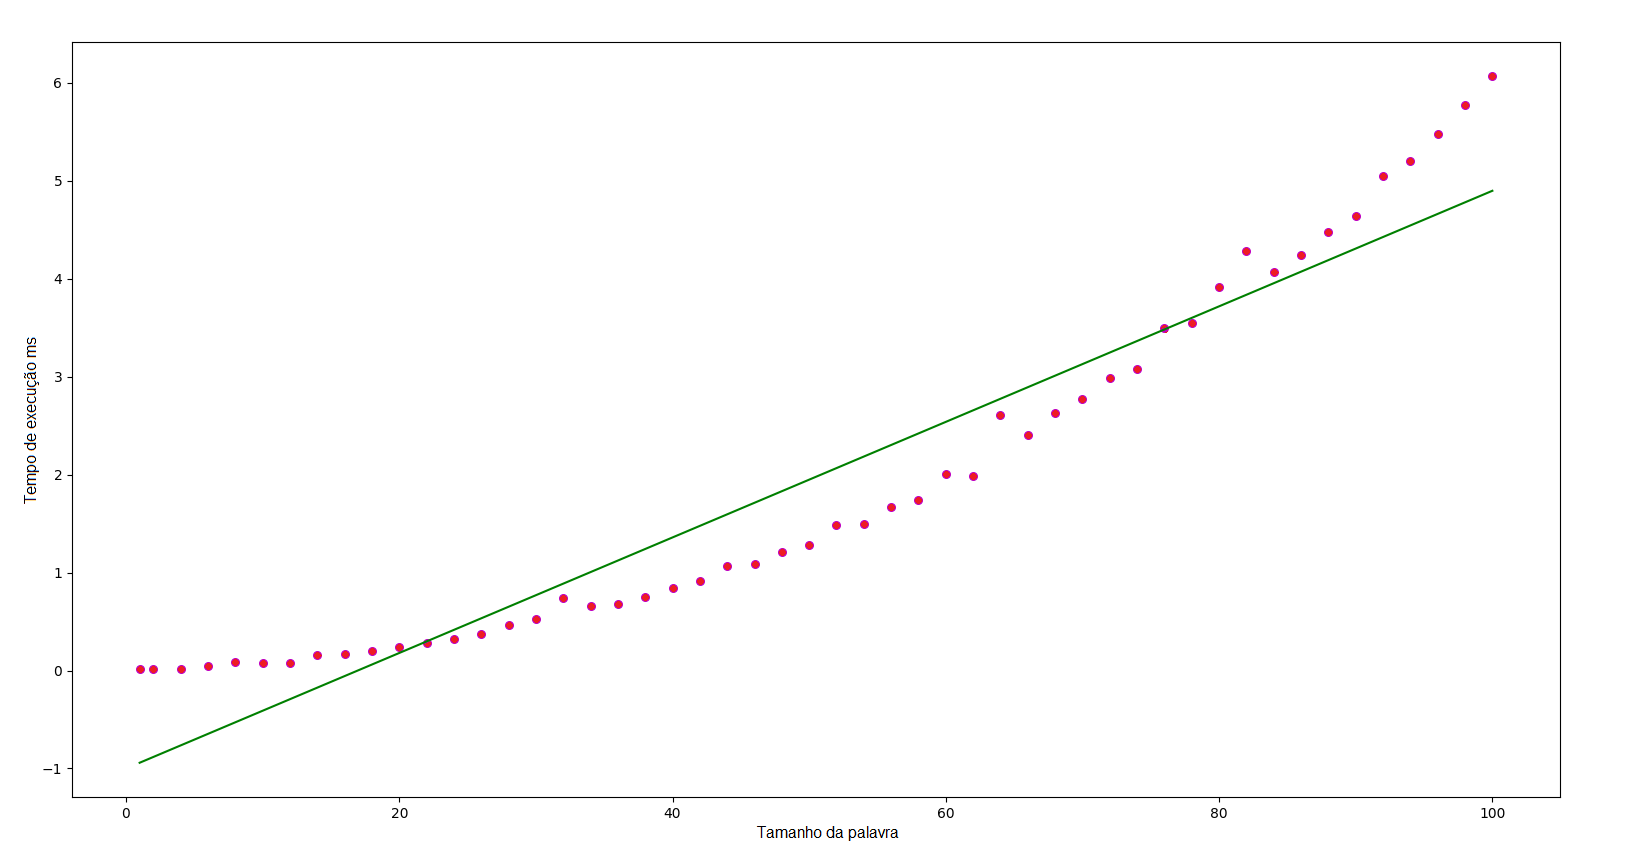

#                                                **Conclusão**

O gráfico acima, mostra que a medida que cresce o tamanho da palavra o tempo de execução também aumenta. Entretanto observa-se uma curva e esse comportamento curvilínio se deve ao aumento das possibilidades ao consumir cada símbolo. Essa taxa de variação do tempo de execução varia de acordo a diversas outras características da Máquina de Turing, por exemplo: quantidade de estados, quantidade de estados finais, quantidade de transições, entre outros.